Materi pengenalan petrofisika dengan Python ini diambil dari *series* yang dibuat oleh Andy McDonald pada laman: https://github.com/andymcdgeo/Petrophysics-Python-Series.

# 1. Membaca Data Log CSV dengan `pandas`

Pada materi pengenalan kita sudah sedikit membahas mengenai modul-modul dalam Python dan sudah mencoba menggunakan modul `math` dan modul `matplotlib`. Data sumur akan kita baca menggunakan modul `pandas`, modul ini berfungsi untuk mengolah dan mengelola data dalam bentuk tabular seperti Comma Separated Values (CSV) atau file Excel. Modul ini juga sering digunakan dalam *data science* karena kebanyakan data juga berbentuk data tabular.

Data sumur yang akan kita gunakan kita unduh dari repositori Github Andy McDonald: [unduh data sumur](https://raw.githubusercontent.com/andymcdgeo/Petrophysics-Python-Series/master/Data/L0509WellData.csv). Setelah data diunduh, upload data tersebut melalui tombol folder di sebelah kiri.

Pembacaan dapat dilakukan menggunakan perintah atau fungsi `read_csv` dari `pandas`:

In [19]:
import pandas as pd

well_data=pd.read_csv("/content/L0509WellData.csv")

Kita dapat melihat preview data menggunakan fungsi `head`:

In [20]:
well_data.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,-999.000000,2.483700,0.018494,0.129119
1,4609.9008,90.721848,-999.000000,2.489308,0.013656,0.108034
2,4610.0008,90.709061,-999.000000,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343


Ringkasan dari data sumur juga dapat didapatkan dengan fungsi `describe`:

In [21]:
well_data.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,4705.800425,67.543849,65.732804,2.554064,0.020477,0.114056
std,55.468658,31.455753,42.362195,0.121438,0.045450,0.039322
min,4609.800800,19.605911,-999.000000,1.947107,-0.132031,0.033476
25%,4657.800600,38.902794,64.283295,2.495097,-0.012742,0.092152
50%,4705.800400,63.487732,67.377380,2.557842,0.006896,0.111190
75%,4753.800200,95.923019,70.074265,2.647077,0.054896,0.128894
max,4801.800000,137.462921,89.620895,2.788836,0.134148,0.417384


Perhatikan pada baris **min** tabel di atas, baris tersebut berisi angka -999, angka ini bukan angka sebenarnya tetapi hanya sebatas angka yang menunjukkan bahwa pada kedalaman tertentu tidak terdapat data. Sebelum analisis kita perlu mengganti nilai -999 ini dengan bilangan bukan angka (*Not a Number/NaN*). Salah satu cara mendapatkan NaN adalah dengan modul `numpy`:

In [22]:
import numpy as np
example_nan=np.nan
example_nan

nan

Untuk mengganti setiap angka -999 di data well dengan NaN kita dapat menggunakan perintah `replace`:

In [23]:
well_data.replace(-999.0, np.nan, inplace=True)

Kita coba lihat lagi di deskripsinya:

In [24]:
well_data.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,1921.000000,1921.000000,1918.000000,1921.000000,1921.000000,1921.000000
mean,4705.800425,67.543849,67.398183,2.554064,0.020477,0.114056
std,55.468658,31.455753,4.525434,0.121438,0.045450,0.039322
min,4609.800800,19.605911,54.929482,1.947107,-0.132031,0.033476
25%,4657.800600,38.902794,64.324596,2.495097,-0.012742,0.092152
50%,4705.800400,63.487732,67.392708,2.557842,0.006896,0.111190
75%,4753.800200,95.923019,70.078076,2.647077,0.054896,0.128894
max,4801.800000,137.462921,89.620895,2.788836,0.134148,0.417384


Dari tabel di atas kita sudah dapat melihat bahwa sudah tidak terdapat lagi angka -999 pada baris **min**.

# 2. Plot Sederhana Menggunakan `pandas`

Pada materi pengenalan kita sudah membicarakan bahwa plot dapat dilakukan menggunakan modul `matplotlib`, walaupun demikian `pandas` juga dapat melakukan plot sederhana karena di `pandas` juga dapat memanggil `matplotlib`:

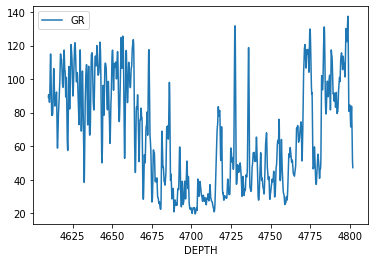

In [25]:
well_data.plot(x = 'DEPTH', y = 'GR')

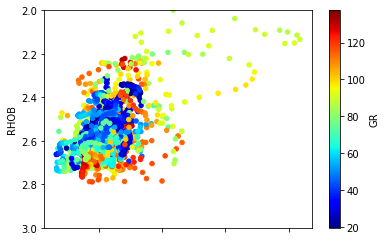

In [26]:
well_data.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='GR', 
          colormap='jet', 
          ylim=(3, 2))

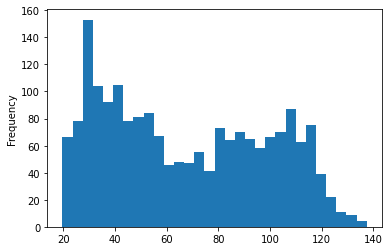

In [27]:
well_data['GR'].plot(kind="hist", bins = 30)

# 3. Plot Menggunakan `matplotlib`

## 3.1. Plot satu log
Sebelumnya kita menggunakan `pandas` untuk mengeplot log menggunakan fungsi yang sederhana, dengan `matplotlib` kita bisa mengeplot dengan lebih leluasa karena parameter plotnya kita bisa ubah sesuai keinginan. Contoh disini kita akan coba mengeplot log Gamma Ray:

(4801.8, 4609.8008)

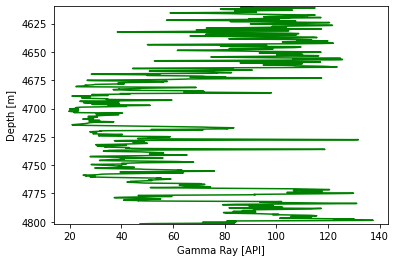

In [33]:
import matplotlib.pyplot as plt

# mengeplot GR
plt.plot(well_data['GR'], well_data['DEPTH'], color="green")

# menuliskan label sumbu x dan sumbu y
plt.ylabel("Depth [m]")
plt.xlabel("Gamma Ray [API]")

# membalik depth
plt.ylim(max(well_data['DEPTH']), min(well_data['DEPTH']))

## 3.2. Plot dua macam log
Selanjutnya kita akan coba menyandingkan dua macam log dalam satu gambar. Kita akan menggunakan `ax` pada matplotlib agar lebih mudah:


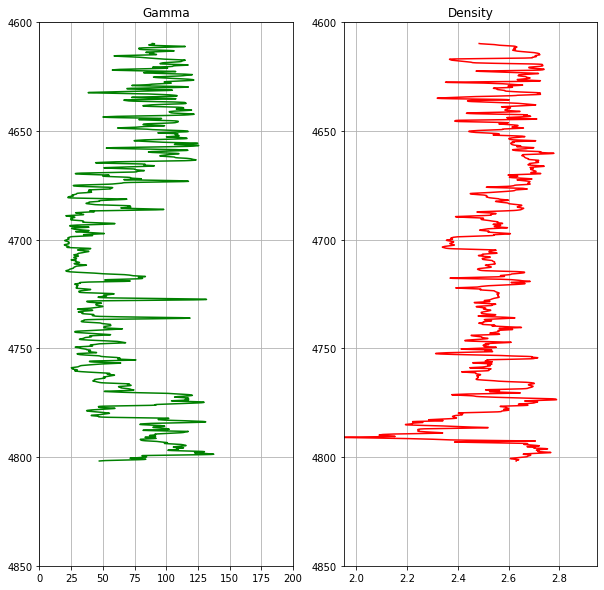

In [35]:
# mendefinisikan `figure` terlebih dahulu sebagai kanvas
fig = plt.subplots(figsize=(10,10))

# karena ada 2 macam plot log maka kita dapat mengguanakan 2 axes (ax)
# (1,2) menunjukkan jumlah baris dan kolom
# (0,0) dan (0,1) menunjukkan posisi baris dan kolom (ingat urutan dimulai dari 0)
# rowspan dan colspan menunjukkan ukuran
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1)

# mengeplot GR, contoh disini lebih mudah karena kita tinggal mendefinisikan nama kolom
# GR dan DEPTH kemudian mendefisikan datanya
ax1.plot("GR", "DEPTH", data = well_data, color = "green")
ax1.set_title("Gamma")
ax1.set_xlim(0, 200) 
ax1.set_ylim(4850, 4600) 
ax1.grid() 

ax2.plot("RHOB", "DEPTH", data = well_data, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(4850, 4600)
ax2.grid()

## 3.3. Mewarnai plot

Plot GR bisa kita warnai untuk membedakan litologi *sand* dan *shale* dengan menggunakan perintah `fill_between` pada matplotlib.

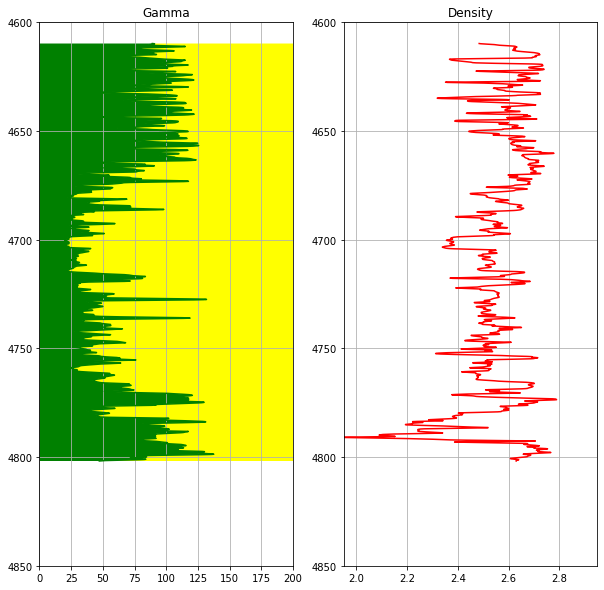

In [44]:
# mendefinisikan `figure` terlebih dahulu sebagai kanvas
fig = plt.subplots(figsize=(10,10))

# karena ada 2 macam plot log maka kita dapat mengguanakan 2 axes (ax)
# (1,2) menunjukkan jumlah baris dan kolom
# (0,0) dan (0,1) menunjukkan posisi baris dan kolom (ingat urutan dimulai dari 0)
# rowspan dan colspan menunjukkan ukuran
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1)

# mengeplot GR, contoh disini lebih mudah karena kita tinggal mendefinisikan nama kolom
# GR dan DEPTH kemudian mendefisikan datanya
ax1.plot("GR", "DEPTH", data = well_data, color = "green")
ax1.set_title("Gamma")
ax1.set_xlim(0, 200) 
ax1.set_ylim(4850, 4600) 
ax1.grid() 

# mewarnai log GR
ax1.fill_betweenx(well_data['DEPTH'], well_data['GR'], 0, facecolor='green')
ax1.fill_betweenx(well_data['DEPTH'], well_data['GR'], 200, facecolor='yellow')

ax2.plot("RHOB", "DEPTH", data = well_data, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(4850, 4600)
ax2.grid()

## 3.4. Plot berimpit (*density*-*neutron*)

Seringkali dalam sebuah data sumur kita melihat dua macam log yang diplot menjadi satu tempat, biasanya plot log *density* dan log *neutron*. Plot berimpit bisa dilakukan dengan mengkloning `ax` untuk density (`ax2`) dengan sumbu y yang sama karena kedalamannya sama (`twiny`).

Pada contoh di bawah ini kita juga akan memisahkan tulisan pada sumbu x (`xlabel`) ke atas dengan mula-mula mengkloning `ax` untuk `ax1` dan `ax2` dan menyembunyikannya. Setelah itu keterangan dapat dipindah ke atas dengan fungsi `ax.spines['top']`:



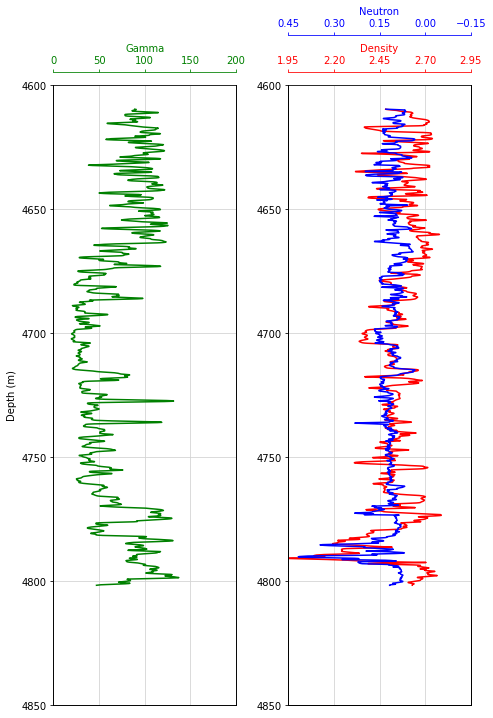

In [37]:
# mendefinisikan `figure` terlebih dahulu sebagai kanvas
fig, ax = plt.subplots(figsize=(10,10))

# karena ada 2 macam plot log maka kita dapat mengguanakan 2 axes (ax)
# ax3 merupakan kloning ax2 (ax3 mewakili neutron), dikloning karena akan diplot berimpit
# kloning menggunakan twiny karena sumbu y yang sama
# (1,2) menunjukkan jumlah baris dan kolom
# (0,0) dan (0,1) menunjukkan posisi baris dan kolom (ingat urutan dimulai dari 0)
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny() #kloning untuk nantinya dipakai neutron

# ini sedikit trik, kita juga akan mengkloning ax1 dan ax1 
# hanya agar tampilan keterangan sumbu x nya bisa diganti dengan mudah
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)


# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well_data, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green") # mengganti warna keterangan sumbu x
ax1.spines["top"].set_edgecolor("green") # memindah keterangan sumbu x ke atas dan warnai hijau
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Density track
ax2.plot("RHOB", "DEPTH", data = well_data, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim(1.95, 2.95)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])

# Neutron track placed ontop of density track
ax3.plot("NPHI", "DEPTH", data = well_data, color = "blue")
ax3.set_xlabel('Neutron')
ax3.xaxis.label.set_color("blue")
ax3.set_xlim(0.45, -0.15)
ax3.set_ylim(4850, 4600)
ax3.tick_params(axis='x', colors="blue")
ax3.spines["top"].set_position(("axes", 1.08)) # pada keterangan neutron dibuat sedikit lebih atas
ax3.spines["top"].set_visible(True)
ax3.spines["top"].set_edgecolor("blue")
ax3.set_xticks([0.45, 0.3, 0.15,0, -0.15])


# untuk mengubah parameter plot yang sama untuk setiap ax kita dapat menggunakan
# loop yang pernah dibahas di materi pendahuluan
for ax in [ax1, ax2]:
    ax.set_ylim(4850, 4600)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()

# 4. Kalkulasi Petrofisika Sederhana

Beberapa kalkulasi petrofisika sederhana akan kita demokan pada materi ini, nantinya peserta dapat memodifikasi untuk analisis yang lain sesuai dengan tujuannya. Untuk kalkulasi petrofisika ini kita akan menggunakan log yang lebih lengkap sehingga akan membaca data lagi, [unduh data log](https://raw.githubusercontent.com/andymcdgeo/Petrophysics-Python-Series/master/Data/15_9-19.csv). 

In [53]:
import pandas as pd

well_data_2=pd.read_csv("15_9-19.csv", skiprows=[1])
well_data_2.replace(-999.0, np.nan, inplace=True)

well_data_2.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025


## 4.1. Kalkulasi volume *shale*

Volume *shale* dapat diturunkan dari log GammaRay dengan fungsi yang cukup sederhana yaitu:

$$ V_{shale} = \frac{GR - GR_{min}}{GR_{max}-GR_{min}} $$

Jika dituangkan dalam fungsi Python:

In [54]:
def shale_volume(GR, GR_min, GR_max):
  vshale=(GR-GR_min)/(GR_max-GR_min)
  return round(vshale, 4)

Setiap nilai dalam log GR harus kita kurangkan nilai minimum GR kemudian dibagi dengan selisih GR maksimum dengan GR minimum, dalam kasus ini berarti kita dapat menggunakan *loop* seperti saat konversi suhu dari celcius ke fahrenheit:

In [61]:
# mengambil list GR
GR = well_data_2['GR']

# mencari nilai maksimum dan minimum, menggunakan kuantil karena data GR ada yang terlalu tinggi
GR_max = GR.quantile(q=0.99)
GR_min = GR.quantile(q=0.01)

# mendefinisikan list kosong untuk nilai vshale
vshale=[]

# melakukan looping untuk menghitung nilai vshale
for gr in GR:
  vsh=shale_volume(gr, GR_min, GR_max)
  vshale.append(vsh)

print(vshale)

[0.1314, 0.1302, 0.1032, 0.0986, 0.0869, 0.0756, 0.0545, 0.0436, 0.036, 0.0376, 0.0397, 0.0485, 0.0504, 0.0469, 0.0393, 0.0404, 0.027, 0.0229, 0.028, 0.0186, 0.0179, 0.0334, 0.028, 0.0205, 0.0307, 0.0256, 0.0349, 0.0368, 0.0325, 0.031, 0.0247, 0.0254, 0.0248, 0.0346, 0.0231, 0.0293, 0.0288, 0.0212, 0.0209, 0.0351, 0.0324, 0.0198, 0.0235, 0.017, 0.0096, 0.0041, 0.0179, 0.0097, 0.0337, 0.0498, 0.0492, 0.0443, 0.053, 0.0613, 0.0479, 0.0298, 0.0385, 0.022, 0.022, 0.0189, 0.0292, 0.0301, 0.0272, 0.0202, 0.0188, 0.0298, 0.0456, 0.0352, 0.0273, 0.0287, 0.0544, 0.0386, 0.0218, 0.026, 0.0432, 0.0535, 0.0376, 0.0315, 0.0214, 0.0159, 0.0298, 0.0287, 0.0265, 0.018, 0.0203, 0.0179, 0.0231, 0.0222, 0.0135, 0.0204, 0.0294, 0.0265, 0.0362, 0.0391, 0.0266, 0.0202, 0.0173, 0.0273, 0.0307, 0.0403, 0.027, 0.0276, 0.0461, 0.042, 0.0323, 0.0393, 0.025, 0.0354, 0.0301, 0.0297, 0.0228, 0.0252, 0.0201, 0.0309, 0.0246, 0.0386, 0.0431, 0.0286, 0.0364, 0.046, 0.0493, 0.0363, 0.0271, 0.022, 0.025, 0.0187, 0.0105, 

Kita selanjutnya dapat mengintegrasi volume *shale* yang kita hitung ke dalam `well_data` dengan perintah sederhana:

In [62]:
well_data_2['VSHALE'] = vshale

Sekarang kita coba lihat tabel `well_data` lagi:

In [63]:
well_data_2.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855,0.1314
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897,0.1302
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940,0.1032
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982,0.0986
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025,0.0869


Kemudian kita coba plot log GR dan VSHALE:

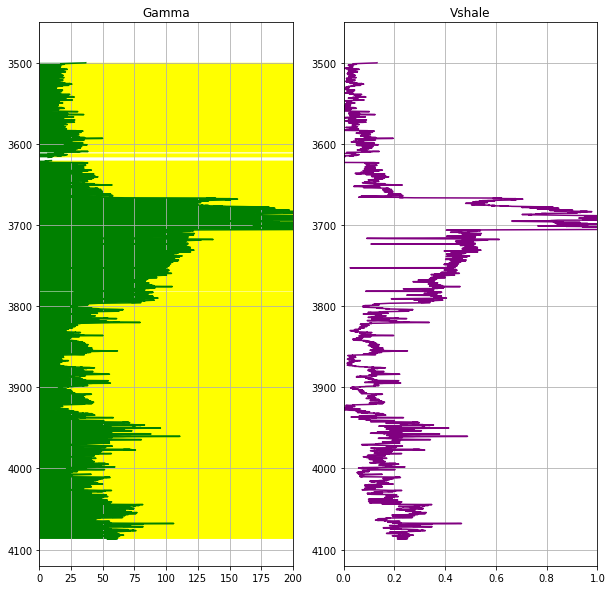

In [68]:
# mendefinisikan `figure` terlebih dahulu sebagai kanvas
fig = plt.subplots(figsize=(10,10))

# karena ada 2 macam plot log maka kita dapat mengguanakan 2 axes (ax)
# (1,2) menunjukkan jumlah baris dan kolom
# (0,0) dan (0,1) menunjukkan posisi baris dan kolom (ingat urutan dimulai dari 0)
# rowspan dan colspan menunjukkan ukuran
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1)

# mengeplot GR, contoh disini lebih mudah karena kita tinggal mendefinisikan nama kolom
# GR dan DEPTH kemudian mendefisikan datanya
ax1.plot("GR", "DEPTH", data = well_data_2, color = "green")
ax1.set_title("Gamma")
ax1.set_xlim(0, 200) 
ax1.set_ylim(4120, 3450)
ax1.grid() 

# mewarnai log GR
ax1.fill_betweenx(well_data_2['DEPTH'], well_data_2['GR'], 0, facecolor='green')
ax1.fill_betweenx(well_data_2['DEPTH'], well_data_2['GR'], 200, facecolor='yellow')

ax2.plot("VSHALE", "DEPTH", data = well_data_2, color = "purple")
ax2.set_title("Vshale")
ax2.set_xlim(0, 1)
ax2.set_ylim(4120, 3450)
ax2.grid()

## 4.2. Kalkulasi porositas-densitas

Porositas dapat diturunkan menggunakan nilai dari log densitas dengan persamaan di bawah ini:

$$ \phi = \frac{\rho_{ma}-\rho_{b}}{\rho_{ma}-\rho_{f}} $$

Jika dituangkan dalam Python maka akan menjadi:

In [70]:
def porosity_density(rho_b, rho_ma=2.65, rho_f=1):
  por = (rho_ma-rho_b)/(rho_ma-rho_f)
  return por

Kemudian kita looping lagi tetapi menggunakan log densitas:



In [71]:
# mengambil list RHOB
RHOB = well_data_2['RHOB']

# menentukan densitas matriks dan fluida
rho_ma=2.65
rho_f=1.0

# mendefinisikan list kosong untuk nilai porositas
phi=[]

# melakukan looping untuk menghitung nilai vshale
for rho_b in RHOB:
  por=porosity_density(rho_b, rho_ma, rho_f)
  phi.append(por)

print(phi)

[0.11503030303030302, 0.11030303030303028, 0.10727272727272703, 0.12296969696969702, 0.12363636363636375, 0.12181818181818187, 0.10369696969696972, 0.11145454545454543, 0.12236363636363622, 0.10430303030303026, 0.09036363636363624, 0.08363636363636358, 0.08727272727272735, 0.08969696969696977, 0.09454545454545436, 0.10539393939393923, 0.08490909090909085, 0.10418181818181815, 0.09818181818181813, 0.09212121212121194, 0.09454545454545436, 0.09878787878787867, 0.10000000000000003, 0.09157575757575759, 0.0993333333333333, 0.08490909090909085, 0.07642424242424249, 0.05824242424242416, 0.0744848484848485, 0.09630303030303033, 0.09575757575757571, 0.08733333333333328, 0.10418181818181815, 0.09400000000000001, 0.09393939393939382, 0.06375757575757574, 0.06545454545454552, 0.0799393939393939, 0.05648484848484846, 0.08290909090909093, 0.086060606060606, 0.09509090909090899, 0.10963636363636355, 0.09400000000000001, 0.10418181818181815, 0.07721212121212105, 0.0896363636363636, 0.0667878787878787

Selanjutnya dapat kita masukkan nilai porositas ke data well:

In [72]:
well_data_2['PHI'] = phi
well_data_2.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE,PHI
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855,0.1314,0.115030
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897,0.1302,0.110303
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940,0.1032,0.107273
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982,0.0986,0.122970
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025,0.0869,0.123636


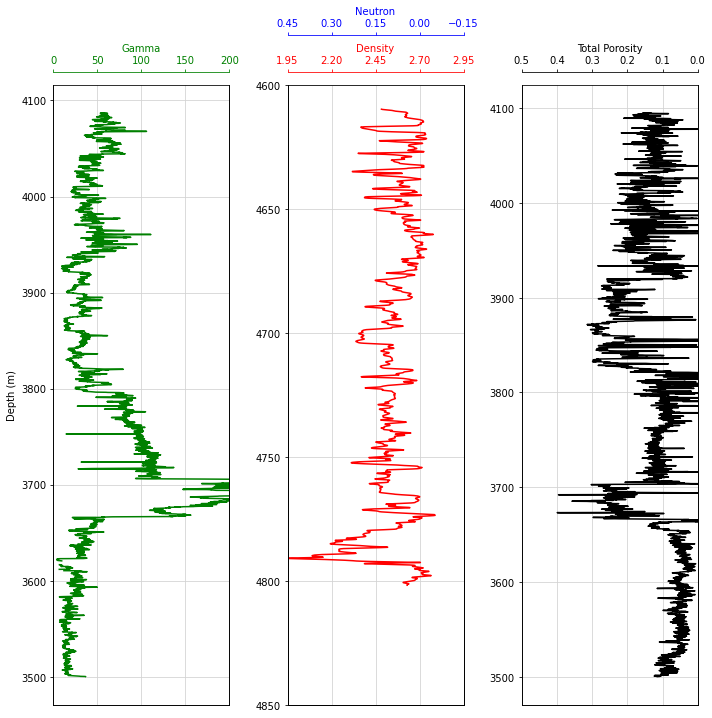

In [80]:
# mendefinisikan `figure` terlebih dahulu sebagai kanvas
fig, ax = plt.subplots(figsize=(10,10))

# karena ada 2 macam plot log maka kita dapat mengguanakan 2 axes (ax)
# ax3 merupakan kloning ax2 (ax3 mewakili neutron), dikloning karena akan diplot berimpit
# kloning menggunakan twiny karena sumbu y yang sama
# (1,2) menunjukkan jumlah baris dan kolom
# (0,0) dan (0,1) menunjukkan posisi baris dan kolom (ingat urutan dimulai dari 0)
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny() #kloning untuk nantinya dipakai neutron
ax4 =  plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

# ini sedikit trik, kita juga akan mengkloning ax1 dan ax1 
# hanya agar tampilan keterangan sumbu x nya bisa diganti dengan mudah
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax4.twiny()
ax9.xaxis.set_visible(False)


# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well_data_2, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green") # mengganti warna keterangan sumbu x
ax1.spines["top"].set_edgecolor("green") # memindah keterangan sumbu x ke atas dan warnai hijau
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Density track
ax2.plot("RHOB", "DEPTH", data = well_data, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim(1.95, 2.95)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])

# Neutron track placed ontop of density track
ax3.plot("NPHI", "DEPTH", data = well_data_2, color = "blue")
ax3.set_xlabel('Neutron')
ax3.xaxis.label.set_color("blue")
ax3.set_xlim(0.45, -0.15)
ax3.set_ylim(4850, 4600)
ax3.tick_params(axis='x', colors="blue")
ax3.spines["top"].set_position(("axes", 1.08)) # pada keterangan neutron dibuat sedikit lebih atas
ax3.spines["top"].set_visible(True)
ax3.spines["top"].set_edgecolor("blue")
ax3.set_xticks([0.45, 0.3, 0.15,0, -0.15])

# phi track
ax4.plot("PHI", "DEPTH", data = well_data_2, color = "black")
ax4.set_xlabel("Total Porosity")
ax4.set_xlim(0.5, 0)
ax4.xaxis.label.set_color("black")
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")

# untuk mengubah parameter plot yang sama untuk setiap ax kita dapat menggunakan
# loop yang pernah dibahas di materi pendahuluan
for ax in [ax1, ax2, ax4]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()

## 4.3. Kalkulasi porositas efektif

Porositas efektif dapat dikalkulasi memanfaatkan nilai porositas dari densitas dengan volume *shale*:

In [74]:
well_data_2['PHIECALC'] = well_data_2['PHI'] - (well_data_2['VSHALE'] * 0.3)
well_data_2.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE,PHI,PHIECALC
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855,0.1314,0.115030,0.075610
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897,0.1302,0.110303,0.071243
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940,0.1032,0.107273,0.076313
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982,0.0986,0.122970,0.093390
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025,0.0869,0.123636,0.097566


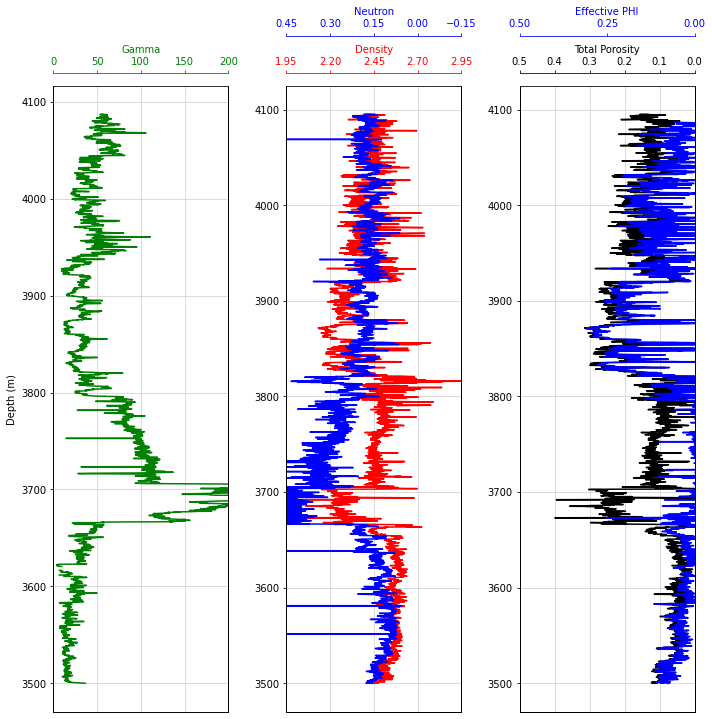

In [84]:
# mendefinisikan `figure` terlebih dahulu sebagai kanvas
fig, ax = plt.subplots(figsize=(10,10))

# karena ada 2 macam plot log maka kita dapat mengguanakan 2 axes (ax)
# ax3 merupakan kloning ax2 (ax3 mewakili neutron), dikloning karena akan diplot berimpit
# kloning menggunakan twiny karena sumbu y yang sama
# (1,2) menunjukkan jumlah baris dan kolom
# (0,0) dan (0,1) menunjukkan posisi baris dan kolom (ingat urutan dimulai dari 0)
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny() #kloning untuk nantinya dipakai neutron
ax4 =  plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax5 = ax4.twiny()

# ini sedikit trik, kita juga akan mengkloning ax1 dan ax1 
# hanya agar tampilan keterangan sumbu x nya bisa diganti dengan mudah
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax4.twiny()
ax9.xaxis.set_visible(False)


# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well_data_2, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green") # mengganti warna keterangan sumbu x
ax1.spines["top"].set_edgecolor("green") # memindah keterangan sumbu x ke atas dan warnai hijau
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Density track
ax2.plot("RHOB", "DEPTH", data = well_data_2, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim(1.95, 2.95)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])

# Neutron track placed ontop of density track
ax3.plot("NPHI", "DEPTH", data = well_data_2, color = "blue")
ax3.set_xlabel('Neutron')
ax3.xaxis.label.set_color("blue")
ax3.set_xlim(0.45, -0.15)
#ax3.set_ylim(4850, 4600)
ax3.tick_params(axis='x', colors="blue")
ax3.spines["top"].set_position(("axes", 1.08)) # pada keterangan neutron dibuat sedikit lebih atas
ax3.spines["top"].set_visible(True)
ax3.spines["top"].set_edgecolor("blue")
ax3.set_xticks([0.45, 0.3, 0.15,0, -0.15])

# phi track
ax4.plot("PHI", "DEPTH", data = well_data_2, color = "black")
ax4.set_xlabel("Total Porosity")
ax4.set_xlim(0.5, 0)
ax4.xaxis.label.set_color("black")
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")

# phieff
ax5.plot("PHIECALC", "DEPTH", data = well_data_2, color = "blue")
ax5.set_xlabel("Effective PHI")
ax5.set_xlim(0.5, 0)
ax5.xaxis.label.set_color("blue")
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0, 0.25, 0.5])

# untuk mengubah parameter plot yang sama untuk setiap ax kita dapat menggunakan
# loop yang pernah dibahas di materi pendahuluan
for ax in [ax1, ax2, ax4]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()

## 4.4. Kalkulasi Saturasi Air



In [86]:
def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = ((archieA / (porosity ** archieM)) * (rw/rt))**(1/archieN)
    return sw

In [87]:
well_data_2['SW'] = sw_archie(well_data_2['PHI'], well_data_2['RT'], well_data_2['RW'], 1, 2, 2)

well_data_2.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE,PHI,PHIECALC,SW
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855,0.1314,0.115030,0.075610,0.943585
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897,0.1302,0.110303,0.071243,0.993783
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940,0.1032,0.107273,0.076313,1.032494
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982,0.0986,0.122970,0.093390,0.907048
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025,0.0869,0.123636,0.097566,0.901891
